# Analysis and insights Python script: Retail market analysis in Madrid
## Part 4: Analysis and insights

### In this part we are going to carry out the actual analysis of the data.

### We are going to start answering the seed questions that were formulated at the beginning of the project.

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sa
import folium

pd.options.display.max_columns = None

## Import the data

In [2]:
con = sa.create_engine('sqlite:///data/airbnb.db')

df = pd.read_sql("df_final", con = con)

df.head()

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,total_price,occupancy_rate,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,purchase_price,distance_center
0,0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,90,4,61,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,102,4.87,4.86,4.83,5590,90.0,83,01_One,1-3,1,48-744,50,209625.0,5.032039
1,1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,346,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21,2476,31.0,5,01_One,1-3,1,5-48,50,92850.0,3.521406
2,2,2,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,73,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,25,4.88,5.00,5.00,5205,92.0,80,01_One,1-3,1,5-48,50,195187.5,0.591065
3,3,3,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,29,2,345,Nice and cozy roon for one person with a priva...,t,1,1.0,1.0,173,4.70,4.71,4.74,4331,29.0,5,01_One,1-3,1,48-744,50,162412.5,3.200942
4,4,4,37921,Piso barrio de salamanca,162926,Salamanca,Recoletos,40.42325,-3.68281,Private room,20,3,291,<b>The space</b><br />Piso de 3 habitaciones y...,f,8,3.0,6.0,0,NaN,NaN,NaN,6633,84.0,20,03_Three,5-16,3-24,1-4,90,447727.5,1.883627


## Analysis

### Price analysis

**What is the average price? What about the price range? What is the variation among the different districts?**

**What is the average renting price ranking for the different districts and neighbourhoods?**

In [3]:
df["total_price"].describe().T

count    19472.000000
mean       174.683905
std       1283.874565
min         20.000000
25%         53.000000
50%         87.000000
75%        135.000000
max      95150.000000
Name: total_price, dtype: float64

There is at least one outlier that unbiases the mean value for the renting price. We are going to use the median instead.

In [4]:
df["total_price"].median()

87.0

In [5]:
df["purchase_price"].median()

195187.5

In [6]:
df.groupby("neighbourhood_group")["total_price"].agg(["median",]).sort_values(by = "median",ascending=False)

,median
neighbourhood_group,
Salamanca,104.0
Centro,97.0
Chamberí,90.0
San Blas - Canillejas,90.0
Chamartín,89.0
Moncloa - Aravaca,87.5
Retiro,80.0
Tetuán,77.0
Arganzuela,74.0


The neighbourhood group of Salamanca appears to be the district with the highest median renting price in Madrid. 

While the lowest median belong to Vicálvaro.

This makes sense for anyone with some knowledge of Madrid. Nothing strange.

Let's compare now the renting price and purchase price.

In [7]:
temp = df.groupby("neighbourhood_group")[["total_price","purchase_price"]].agg("median")
temp

,total_price,purchase_price
neighbourhood_group,,
Arganzuela,74.0,162412.5
Barajas,60.0,128025.0
Carabanchel,60.0,87487.5
Centro,97.0,195187.5
Chamartín,89.0,209625.0
Chamberí,90.0,220125.0
Ciudad Lineal,60.0,122062.5
Fuencarral - El Pardo,65.0,142762.5
Hortaleza,74.0,143400.0


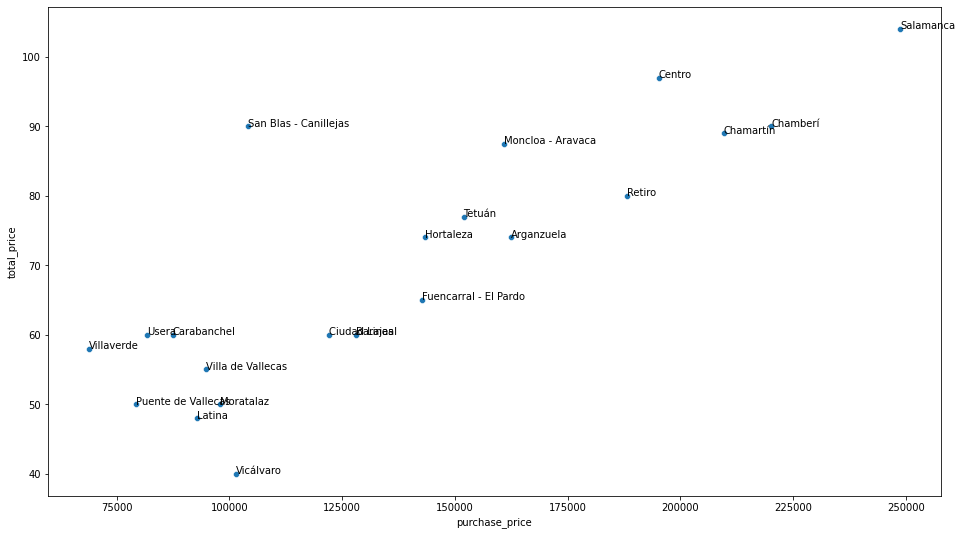

In [8]:
plt.figure(figsize = (16,9))
sns.scatterplot(data = temp, x = "purchase_price", y = "total_price")

# Put the labels
for i in range(0,temp.shape[0]):
    plt.text(temp.purchase_price[i], temp.total_price[i], temp.index[i])

This scatter plot helps us to identify which neighbourhood groups are most profitable and which ones are not.

- It is clear that Salamanca presents the highest median renting price, but also the highest median purchase price.
- Three different clusters can be observed, grouping by low, medium and high prices.
- There is one particular group with relatively low purchase price and high renting price. This is San Blas - Canillejas. 

In [9]:
df[df["neighbourhood_group"] == "San Blas - Canillejas"].sort_values(by = "price", ascending=False).head(10)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,total_price,occupancy_rate,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,purchase_price,distance_center
5022,5022,5022,23969176,Modern and cozy apartment - Airport,63135524,San Blas - Canillejas,Rejas,40.44407,-3.58457,Entire home/apt,7806,4,0,We offer you our beautiful apartment with view...,f,2,1.0,1.0,17,4.94,5.0,4.88,2776,7806.0,100,01_One,1-3,1,5-48,50,104100.0,10.505356
7983,7983,7983,35149419,CHALET FOR THE FINAL CHAMPIONS LEAGUE MADRID,143732655,San Blas - Canillejas,Canillejas,40.44937,-3.61633,Entire home/apt,6000,1,365,We are talking about one of the last villas fo...,f,6,4.0,5.0,0,NaN,NaN,NaN,2776,6000.0,0,04_Four or more,5-16,3-24,1-4,120,249840.0,8.212429
8181,8181,8181,35251141,Se alquila para final de la champion league,265376740,San Blas - Canillejas,Canillejas,40.44292,-3.60764,Entire home/apt,3000,1,365,None,f,1,2.0,4.0,0,NaN,NaN,NaN,2776,3000.0,0,02_Two,1-3,3-24,1-4,70,145740.0,8.610212
7699,7699,7699,34836238,"ALQUILER ÁTICO, CHAMPIONS, A 10min DEL WANDA.",262622230,San Blas - Canillejas,Simancas,40.43879,-3.61425,Entire home/apt,3000,1,363,"CHAMPION, Ático a 10 min del Wanda, metro Torr...",f,4,2.0,1.0,0,NaN,NaN,NaN,2776,3000.0,0,02_Two,4,1,1-4,70,145740.0,7.932095
7668,7668,7668,34826962,Pozos rooms,222068421,San Blas - Canillejas,Arcos,40.41927,-3.61555,Private room,3000,1,88,Cerca nos podemos encontrar un centro comercia...,f,4,2.0,3.0,0,NaN,NaN,NaN,2776,6300.0,75,02_Two,4,2,1-4,70,145740.0,7.439364
7380,7380,7380,34600594,3 rooms near Wanda,38951538,San Blas - Canillejas,Arcos,40.42105,-3.61457,Private room,2800,1,0,3 rooms 15´walking from Wanda.,f,6,3.0,5.0,0,NaN,NaN,NaN,2776,9800.0,100,03_Three,5-16,3-24,1-4,90,187380.0,7.532233
7234,7234,7234,34566381,Alquiler piso para final de la Champions league,260821774,San Blas - Canillejas,Simancas,40.43502,-3.62565,Entire home/apt,2600,2,0,Piso muy acogedor e iluminado con 2 habitacion...,f,4,2.0,1.0,0,NaN,NaN,NaN,2776,2600.0,100,02_Two,4,1,1-4,70,145740.0,6.885409
7471,7471,7471,34669854,¡FINAL CHAMPION! A 15 MINUTOS ANDANDO DEL ESTADIO,123178707,San Blas - Canillejas,Canillejas,40.44857,-3.61360,Entire home/apt,2300,1,90,Bonito chalet para pasar la noche de la final ...,f,4,3.0,3.0,0,NaN,NaN,NaN,2776,2300.0,75,03_Three,4,2,1-4,90,187380.0,8.382420
7763,7763,7763,34933116,FINAL CHAMPIONS LEAGUE MADRID,263232278,San Blas - Canillejas,Simancas,40.43968,-3.61933,Private room,2000,2,365,Near (15 minutes walking) to WANDA STADIUM.<br...,f,5,3.0,3.0,0,NaN,NaN,NaN,2776,4200.0,0,03_Three,5-16,2,1-4,90,187380.0,7.557076
7246,7246,7246,34617940,~10 minutes on foot from the wanda stadium~,261166073,San Blas - Canillejas,Canillejas,40.44567,-3.60970,Entire home/apt,2000,2,0,Apartment with 2 bedrooms and swimming pool 10...,f,6,2.0,4.0,0,NaN,NaN,NaN,2776,2000.0,100,02_Two,5-16,3-24,1-4,70,145740.0,8.556462


There are very high renting prices between 2.000€ and 7.800€. That's a lot of money for San Blas.

If we take a look at the description we see references to Champions League football match.

This is already an insight:

**Insight 1: there can exist properties with low purchase price but with very high renting prices for some specific sport events throughout the year.**

We could think of a renting product in this region, with a considerably lower rent throughout the year for the tenant under the condition that the tenant leaves the property free for renting during these sport events.

Let's repeat the analysis at neighbourhood level.

In [10]:
temp = df.groupby("neighbourhood")[["total_price","purchase_price"]].agg("median")
temp.sort_values(by = "total_price", ascending=False)

,total_price,purchase_price
neighbourhood,,
Rosas,400.0,104100.0
Amposta,350.0,104100.0
Recoletos,132.0,248737.5
Castellana,124.0,248737.5
Jerónimos,124.0,188137.5
...,...,...
Aluche,38.5,92850.0
Entrevías,38.0,79200.0
Ambroz,35.0,101550.0


In [11]:
temp = df[(df["neighbourhood"] != "Rosas") & (df["neighbourhood"] != "Amposta")].groupby("neighbourhood")[["total_price","purchase_price"]].agg("median")
temp.sort_values(by = "total_price", ascending=False)

,total_price,purchase_price
neighbourhood,,
Recoletos,132.0,248737.5
Jerónimos,124.0,188137.5
Castellana,124.0,248737.5
Goya,117.0,248737.5
El Viso,116.0,209625.0
...,...,...
Aluche,38.5,92850.0
Entrevías,38.0,79200.0
Ambroz,35.0,101550.0


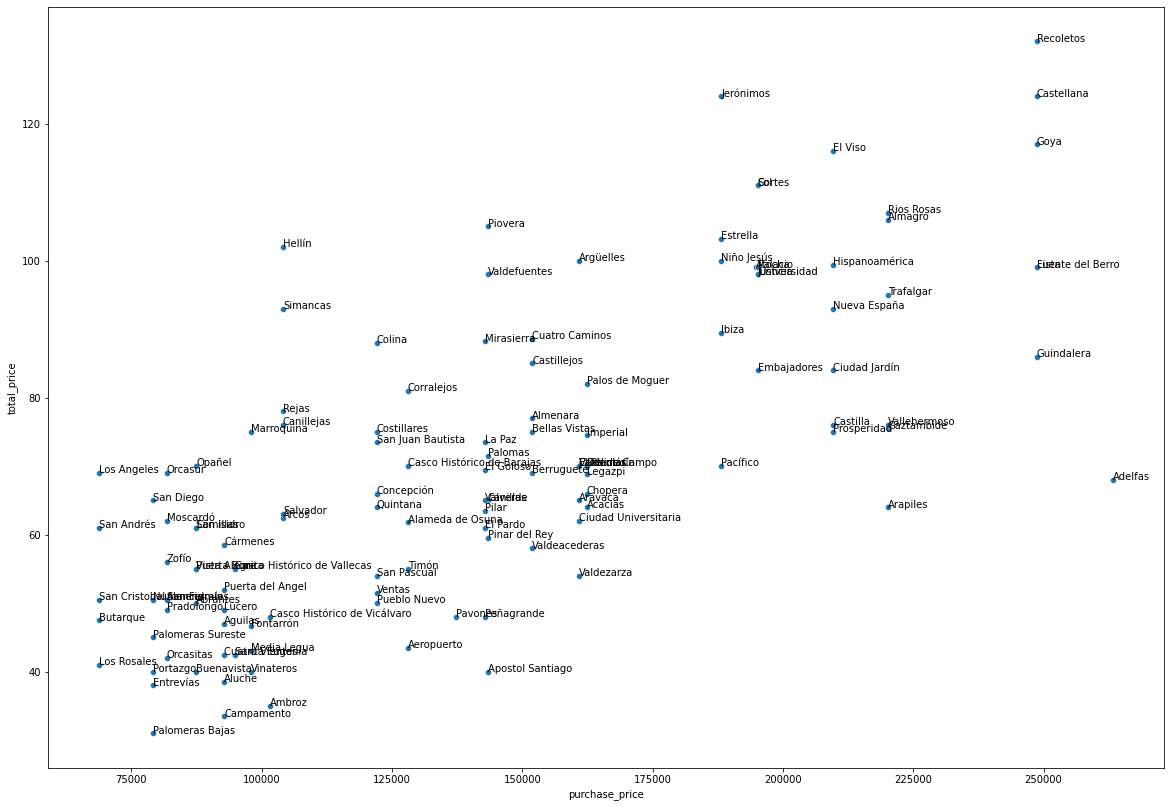

In [12]:
plt.figure(figsize = (20,14))
sns.scatterplot(data = temp, x = "purchase_price", y = "total_price")

# Put the labels
for i in range(0,temp.shape[0]):
    plt.text(temp.purchase_price[i], temp.total_price[i], temp.index[i])

At neighbourhood level we can observe more things:

- 2 outstanding neighbourhoods (Rosas and Canillejas), probably from San Blas - Canillejas
- Inside each cluster we can separate
    * Low level: Hellín, Simancas, Rejas, Marroquina
    * Mid level: Piovera, Valdefuentes, Argüelles
    * Mid-high level: Jerónimos, El Viso, Estrella
    * High level: Recoletos

**Insight 2: There are some neighbourhoods that can maximise the cost-revenue relationship, and we can classify them according to the quality level we might be interested in investing.**

In [13]:
df.loc[df["neighbourhood"].isin(['Rosas','Canillejas']),"neighbourhood_group"].unique()

array(['San Blas - Canillejas'], dtype=object)

**Are there other factors that determine the renting price?**

Let's analyse this by grouping the renting and purchase price by the following relevant dimensions:

- bedrooms_disc
- accomodates_disc
- beds_disc
- number_of_reviews_disc

In [14]:
metrics = ['total_price','purchase_price']
dimensions = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicube_price = df[dimensions + metrics]
minicube_price

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,total_price,purchase_price
0,01_One,1-3,1,48-744,90.0,209625.0
1,01_One,1-3,1,5-48,31.0,92850.0
2,01_One,1-3,1,5-48,92.0,195187.5
3,01_One,1-3,1,48-744,29.0,162412.5
4,03_Three,5-16,3-24,1-4,84.0,447727.5
...,...,...,...,...,...,...
19467,01_One,1-3,1,1-4,42.0,128025.0
19468,02_Two,4,1,1-4,112.0,273262.5
19469,02_Two,5-16,2,1-4,117.0,293475.0
19470,01_One,1-3,1,1-4,75.0,122062.5


In [15]:
minicube_price = minicube_price.melt(id_vars=["total_price","purchase_price"])
minicube_price

,total_price,purchase_price,variable,value
0,90.0,209625.0,bedrooms_disc,01_One
1,31.0,92850.0,bedrooms_disc,01_One
2,92.0,195187.5,bedrooms_disc,01_One
3,29.0,162412.5,bedrooms_disc,01_One
4,84.0,447727.5,bedrooms_disc,03_Three
...,...,...,...,...
77883,42.0,128025.0,number_of_reviews_disc,1-4
77884,112.0,273262.5,number_of_reviews_disc,1-4
77885,117.0,293475.0,number_of_reviews_disc,1-4
77886,75.0,122062.5,number_of_reviews_disc,1-4


In [16]:
minicube_price = minicube_price.groupby(["variable","value"])[["total_price","purchase_price"]].agg("median")
minicube_price

total_price  purchase_price
variable               value                                       
accommodates_disc      1-3                     63.0        195187.5
                       4                      104.0        195187.5
                       5-16                   156.0        273262.5
bedrooms_disc          01_One                  70.0        195187.5
                       02_Two                 123.0        273262.5
                       03_Three               170.0        351337.5
                       04_Four or more        250.0        468450.0
beds_disc              1                       73.0        195187.5
                       2                      126.0        273262.5
                       3-24                   170.0        292342.5
number_of_reviews_disc 1-4                     88.0        195187.5
                       48-744                  85.0        195187.5
                       5-48                    86.0        195187.5

The price is ready to be analysed by the different relevant dimensions. 

Let's start with bedrooms_disc.

In [17]:
minicube_price.loc["bedrooms_disc"]

,total_price,purchase_price
value,,
01_One,70.0,195187.5
02_Two,123.0,273262.5
03_Three,170.0,351337.5
04_Four or more,250.0,468450.0


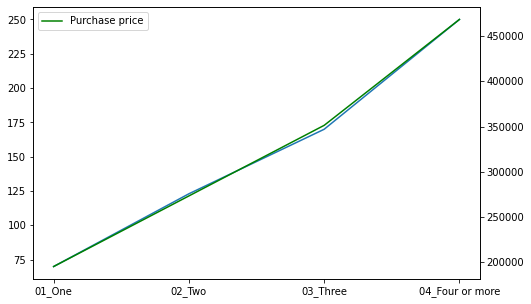

In [18]:
f, ax = plt.subplots(figsize=(8,5))
ax.plot(minicube_price.loc['bedrooms_disc']["total_price"], label="Renting price")
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['bedrooms_disc']["purchase_price"], color ="g", label="Purchase price")
ax2.legend();

Regarding the number of bedrooms there is nothing to highlight.

The more bedrooms the more expensive it is to rent and to buy the property.

Let's see with the number of beds.

In [19]:
minicube_price.loc["beds_disc"]

,total_price,purchase_price
value,,
1,73.0,195187.5
2,126.0,273262.5
3-24,170.0,292342.5


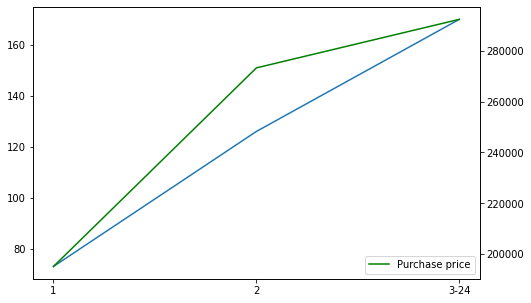

In [20]:
f, ax = plt.subplots(figsize=(8,5))
ax.plot(minicube_price.loc['beds_disc']["total_price"], label="Renting price")
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['beds_disc']["purchase_price"], color ="g", label="Purchase price")
ax2.legend(loc=4);

Here is a clear conclusion:

**Insight 3: we should avoid 2 beds.** Either we put 1 bed or we try to fit as many as possible.

Since this effect was not visible with the number of bedrooms, maybe the property owners are trying to put as many beds as possible.

Let's see what is going on with properties with 1 bedroom.

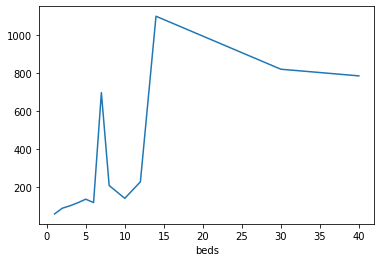

In [21]:
df[df["bedrooms"] == 1].groupby("beds")["total_price"].median().plot();

There are 1 bedroom properties with many beds, up to 40. Of course these high numbers might belong to some special building or hostel.

This is a topic we should discuss with someone with more knowledge about the business.

Let's analyse the number of accommodates.

In [22]:
minicube_price.loc["accommodates_disc"]

,total_price,purchase_price
value,,
1-3,63.0,195187.5
4,104.0,195187.5
5-16,156.0,273262.5


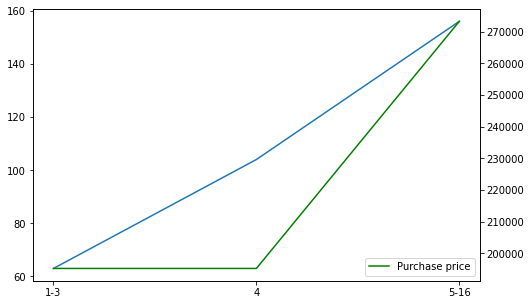

In [23]:
f, ax = plt.subplots(figsize=(8,5))
ax.plot(minicube_price.loc['accommodates_disc']["total_price"], label="Renting price")
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['accommodates_disc']["purchase_price"], color ="g", label="Purchase price")
ax2.legend(loc=4);

**Insight 4: the optimum number of accommodates is 4, because the property price for hosting 4 people is the same as for hosting 1, 2 or 3 people. For more than 5 people the property needs to be larger and the purchase price considerably increases.**

Let's analyse now the distance variable to Puerta del Sol and how it influences the renting and purchase price.

In [24]:
df.groupby("neighbourhood_group")["distance_center"].agg("median").sort_values()

neighbourhood_group
Centro                    0.717885
Arganzuela                1.799559
Moncloa - Aravaca         2.039764
Chamberí                  2.066546
Retiro                    2.425713
Salamanca                 2.726696
Latina                    3.357823
Carabanchel               3.622128
Usera                     3.659065
Puente de Vallecas        4.209178
Chamartín                 4.209356
Tetuán                    4.573343
Moratalaz                 4.988318
Ciudad Lineal             5.223777
Villaverde                7.636224
Fuencarral - El Pardo     7.705474
San Blas - Canillejas     8.000888
Hortaleza                 8.043008
Vicálvaro                 8.613504
Villa de Vallecas         8.744664
Barajas                  11.581542
Name: distance_center, dtype: float64

We are going to keep the first 7 neighbourhood groups (up to Latina).

In [25]:
df.groupby("neighbourhood_group")["distance_center"].agg("median").sort_values()[0:7]

neighbourhood_group
Centro               0.717885
Arganzuela           1.799559
Moncloa - Aravaca    2.039764
Chamberí             2.066546
Retiro               2.425713
Salamanca            2.726696
Latina               3.357823
Name: distance_center, dtype: float64

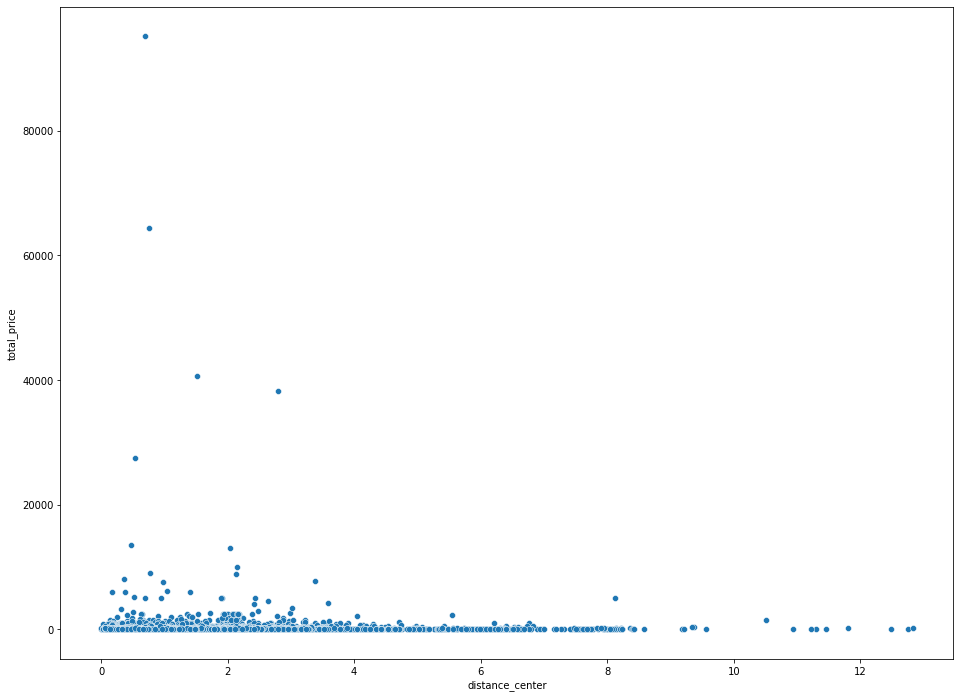

In [26]:
seleccion = df.groupby("neighbourhood_group")["distance_center"].median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df["neighbourhood_group"].isin(seleccion)], x = "distance_center", y = "total_price");

Apart from the outliers that refer to prices higher than 20.000€, there is no a clear relantionship between the distance to the city center and the renting price.

**Insight 5: being close to the city center does not have a big influence on the renting price. This opens the door to look for properties in a centric neighbourhood but not next to the city center and we can expect a lower purchase price.**

### Availability analysis

**What is the mean availability? What is the variation among the different districts?**

**What is the average availability ranking for the different districts and neighbourhoods?**

In [27]:
df["occupancy_rate"].describe()

count    19472.000000
mean        53.158279
std         38.603002
min          0.000000
25%         10.000000
50%         56.000000
75%         94.000000
max        100.000000
Name: occupancy_rate, dtype: float64

The mean occupancy rate is 53% of the year.

In [28]:
df.groupby("neighbourhood_group")["occupancy_rate"].mean().sort_values(ascending=False)

neighbourhood_group
Arganzuela               61.749511
Moncloa - Aravaca        57.932862
Chamberí                 55.862191
Retiro                   55.680282
Chamartín                55.460481
Latina                   54.173196
Barajas                  53.968153
Salamanca                53.408989
Ciudad Lineal            53.329372
Villaverde               53.136691
Centro                   52.908531
Moratalaz                52.702970
Hortaleza                51.207547
Fuencarral - El Pardo    50.630350
Tetuán                   50.456803
San Blas - Canillejas    49.494600
Carabanchel              48.147103
Villa de Vallecas        47.333333
Vicálvaro                47.266667
Usera                    45.842900
Puente de Vallecas       44.934132
Name: occupancy_rate, dtype: float64

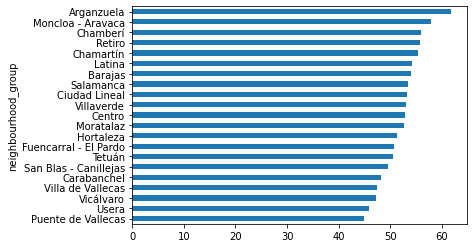

In [29]:
df.groupby("neighbourhood_group")["occupancy_rate"].mean().sort_values(ascending=True).plot(kind="barh");

The largest demand is for Arganzuela and Moncloa, but there is nothing to highlight from here.

Is there any relationship between the most demanded properties and the distance to the city center?

In [30]:
df.groupby("neighbourhood_group")[["occupancy_rate","distance_center"]].mean().sort_values(by="occupancy_rate",ascending=False)

,occupancy_rate,distance_center
neighbourhood_group,,
Arganzuela,61.749511,1.914219
Moncloa - Aravaca,57.932862,3.149567
Chamberí,55.862191,2.138527
Retiro,55.680282,2.461257
Chamartín,55.460481,4.420761
Latina,54.173196,3.854300
Barajas,53.968153,11.450702
Salamanca,53.408989,2.714501
Ciudad Lineal,53.329372,5.262423


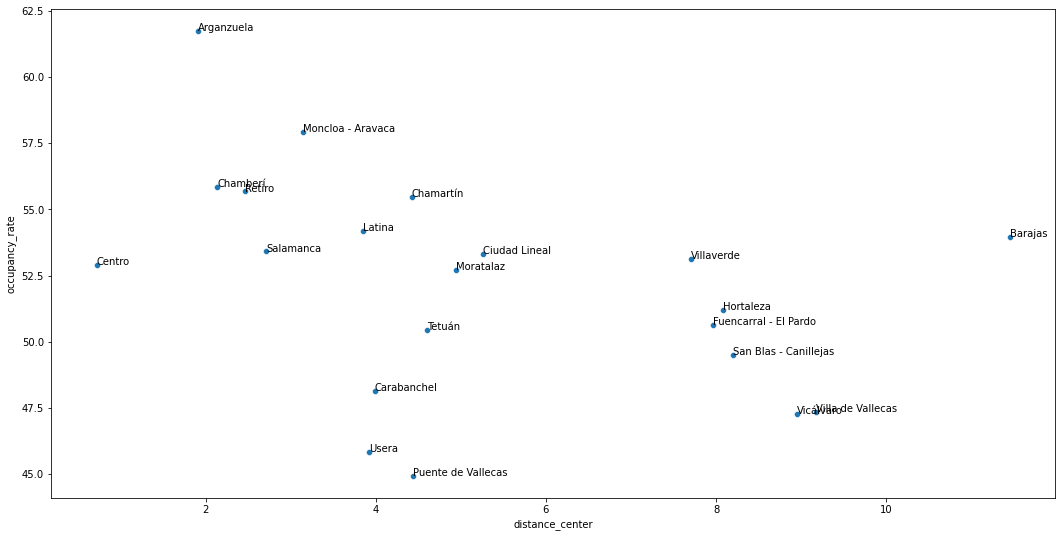

In [31]:
temp = df.groupby("neighbourhood_group")[["occupancy_rate","distance_center"]].agg("mean")

plt.figure(figsize = (18,9))
sns.scatterplot(data = temp, x = "distance_center", y = "occupancy_rate")

# Put the labels
for i in range(0,temp.shape[0]):
    plt.text(temp.distance_center[i], temp.occupancy_rate[i], temp.index[i])

The distance to the city center did not appear to be an important factor when comparing renting and purchase price. But here we can see that the occupancy rate decreases as we get further away from the city center.

There are some exceptions like Barajas, which is very close to the airport and happens to be the furthest away, but not the least demanded. 

This analysis leaves Arganzuela and Moncloa-Aravaca as the most demanded neighbourhood groups, which are also very close to the city center.

But this might be for some reasons: 
- Maybe the amount of properties in Arganzuela and Moncloa are large and then the renting price reduces, leading to more demand by the users.
- Probably there are more entertainment places inside these districts, attracting more tenants to these areas.

What is the relationship between the number of properties and the distance to the city center by district?

In [32]:
df.groupby("neighbourhood_group")[["occupancy_rate","distance_center"]].agg({"occupancy_rate":"count","distance_center":"mean"}).sort_values(by="occupancy_rate",ascending=False)

,occupancy_rate,distance_center
neighbourhood_group,,
Centro,8932,0.720685
Salamanca,1335,2.714501
Chamberí,1132,2.138527
Arganzuela,1022,1.914219
Tetuán,926,4.605550
Retiro,710,2.461257
Carabanchel,673,3.989676
Ciudad Lineal,589,5.262423
Chamartín,582,4.420761


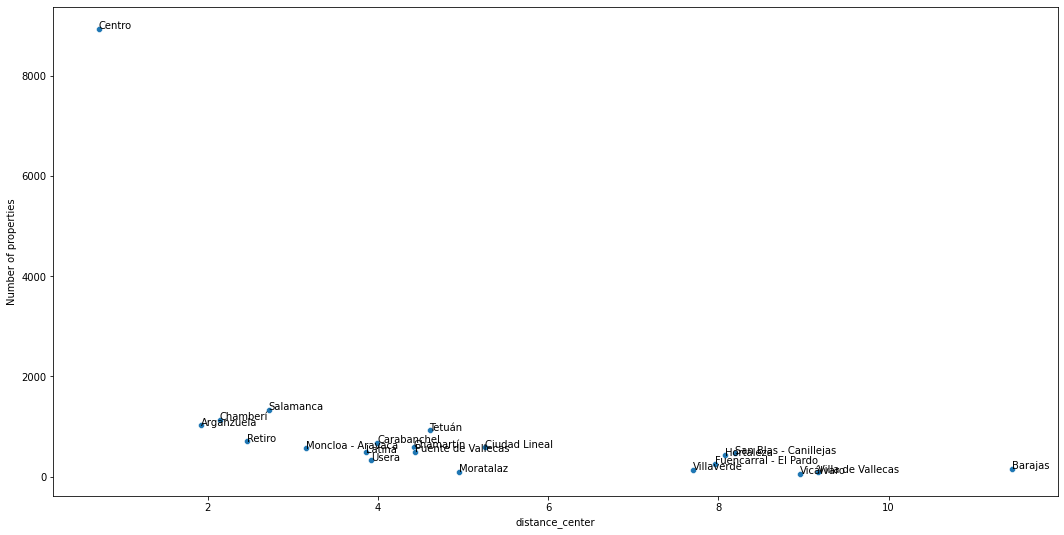

In [33]:
temp = df.groupby("neighbourhood_group")[["occupancy_rate","distance_center"]].agg({"occupancy_rate":"count","distance_center":"mean"}).sort_values(by="occupancy_rate",ascending=False)

plt.figure(figsize = (18,9))
sns.scatterplot(data = temp, x = "distance_center", y = "occupancy_rate")
plt.ylabel("Number of properties")
# Put the labels
for i in range(0,temp.shape[0]):
    plt.text(temp.distance_center[i], temp.occupancy_rate[i], temp.index[i])

We can clearly see the further from the city center the less properties are available for renting. 

**What other factors determine the availability?**

In [34]:
metrics = ["occupancy_rate"]
dimensions = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']
minicube_price = df[dimensions + metrics]

minicube_price = minicube_price.melt(id_vars=["occupancy_rate"])
minicube_price = minicube_price.groupby(["variable","value"])[["occupancy_rate"]].agg("mean")
minicube_price

occupancy_rate
variable               value                          
accommodates_disc      1-3                   55.643044
                       4                     50.028479
                       5-16                  48.970457
bedrooms_disc          01_One                53.834514
                       02_Two                52.329186
                       03_Three              50.604651
                       04_Four or more       48.554167
beds_disc              1                     54.051404
                       2                     51.727820
                       3-24                  48.948989
number_of_reviews_disc 1-4                   54.342124
                       48-744                54.623457
                       5-48                  50.096360

Let's analyse by bedrooms.

In [35]:
minicube_price.loc["bedrooms_disc"]

,occupancy_rate
value,
01_One,53.834514
02_Two,52.329186
03_Three,50.604651
04_Four or more,48.554167


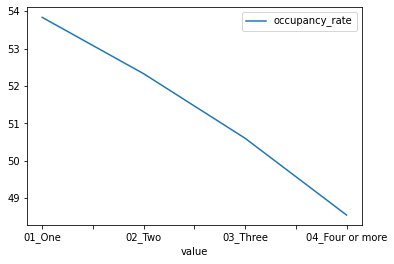

In [36]:
minicube_price.loc["bedrooms_disc"].plot();

One bedroom properties are the most demanded ones. Probably that might be because one bedroom apartments have the lowest renting prices, so people prefer renting small apartments even if there are more tenants than allowed accommodates. 

Let's see if that's true.

In [37]:
minicube_price.loc["accommodates_disc"]

,occupancy_rate
value,
1-3,55.643044
4,50.028479
5-16,48.970457


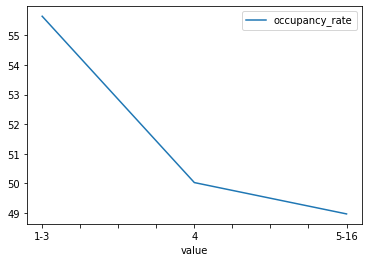

In [38]:
minicube_price.loc["accommodates_disc"].plot();

Indeed the most demanded properties are the ones for less accommodates. Then for 5-16 accommodates are the least demanded, but their renting price is also higher.

**Insight 6: the users demand smaller apartments that can fit up to 3 guests. Probably they prefer those apartments and try to fit more than the permitted amount of accommodates.**

Is there anything relevant for the number of beds?

In [39]:
minicube_price.loc["beds_disc"]

,occupancy_rate
value,
1,54.051404
2,51.727820
3-24,48.948989


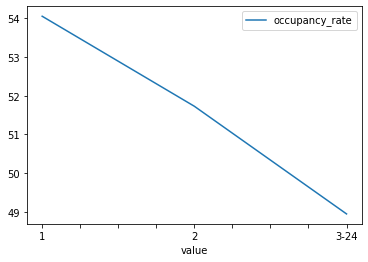

In [40]:
minicube_price.loc["beds_disc"].plot();

This reinforces insight 6. One bed properties are more demanded than with more beds.

Let's see if there is any relationship with the number of reviews:

In [41]:
minicube_price.loc["number_of_reviews_disc"]

,occupancy_rate
value,
1-4,54.342124
48-744,54.623457
5-48,50.096360


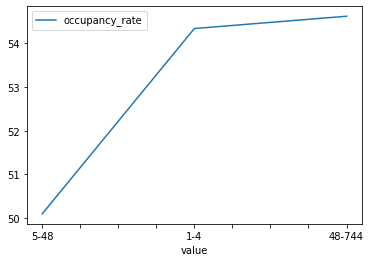

In [42]:
minicube_price.loc["number_of_reviews_disc"].sort_values(by = "occupancy_rate").plot();

Apparently, the more reviews the higher the occupancy rate. But if the number of reviews is between 5 and 48, the demand decreases. 

### Property price analysis

**What is the property price ranking by m<sup>2</sup> by district?**

**What is the relationship between the property price and the renting price by district?**

**What is the relationship between the property price and the availability by district?**

In [43]:
df["purchase_price"].describe()

count     19472.000000
mean     208119.237495
std       83247.017354
min       68775.000000
25%      162412.500000
50%      195187.500000
75%      248737.500000
max      746212.500000
Name: purchase_price, dtype: float64

The mean price of a property is around 208.000€. How does the price vary per district?

In [44]:
df.groupby("neighbourhood_group")[["purchase_price","m2"]].mean().sort_values(by="purchase_price",ascending=False)

,purchase_price,m2
neighbourhood_group,,
Salamanca,305937.808989,61.498127
Chamberí,265627.871025,60.335689
Chamartín,248956.701031,59.381443
Retiro,233131.510563,61.957746
Centro,230383.311408,59.015898
Moncloa - Aravaca,191446.073322,59.487633
Arganzuela,188633.696184,58.072407
Tetuán,175831.336393,57.872570
Fuencarral - El Pardo,171870.496109,60.194553


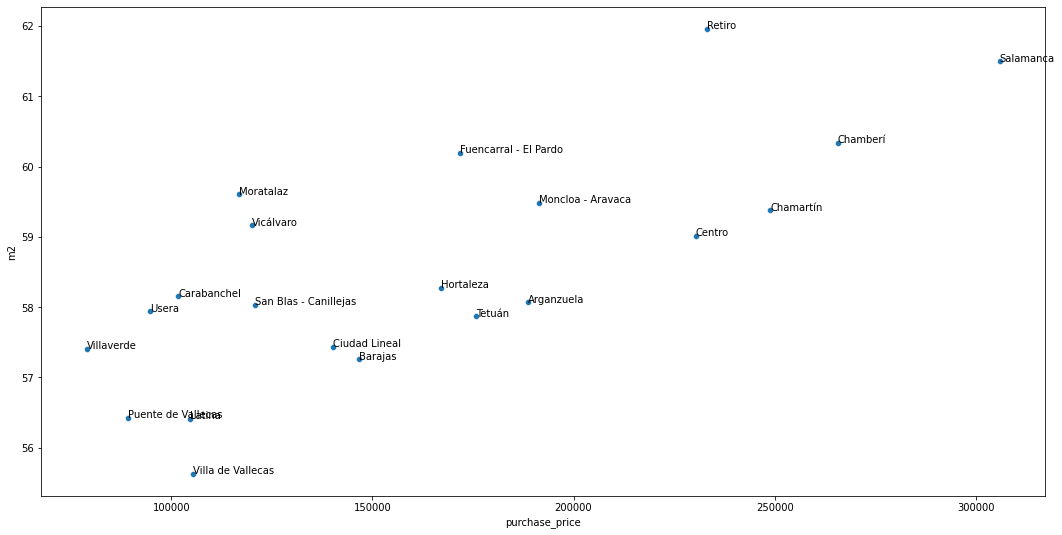

In [45]:
temp = df.groupby("neighbourhood_group")[["purchase_price","m2"]].agg("mean")

plt.figure(figsize = (18,9))
sns.scatterplot(data = temp, x = "purchase_price", y = "m2")

# Put the labels
for i in range(0,temp.shape[0]):
    plt.text(temp.purchase_price[i], temp.m2[i], temp.index[i])

The biggest properties belong to the most expensive properties in the most expensive districts. 

Here we can highlight the districts of Moratalaz and Vicálvaro as the places to look for bigger properties at relatively low prices.

Is there any relationship between the purchase price and occupancy rate by district?

In [46]:
df.groupby("neighbourhood_group")[["purchase_price","occupancy_rate"]].mean().sort_values(by="occupancy_rate",ascending=False)

,purchase_price,occupancy_rate
neighbourhood_group,,
Arganzuela,188633.696184,61.749511
Moncloa - Aravaca,191446.073322,57.932862
Chamberí,265627.871025,55.862191
Retiro,233131.510563,55.680282
Chamartín,248956.701031,55.460481
Latina,104757.773196,54.173196
Barajas,146617.165605,53.968153
Salamanca,305937.808989,53.408989
Ciudad Lineal,140216.447368,53.329372


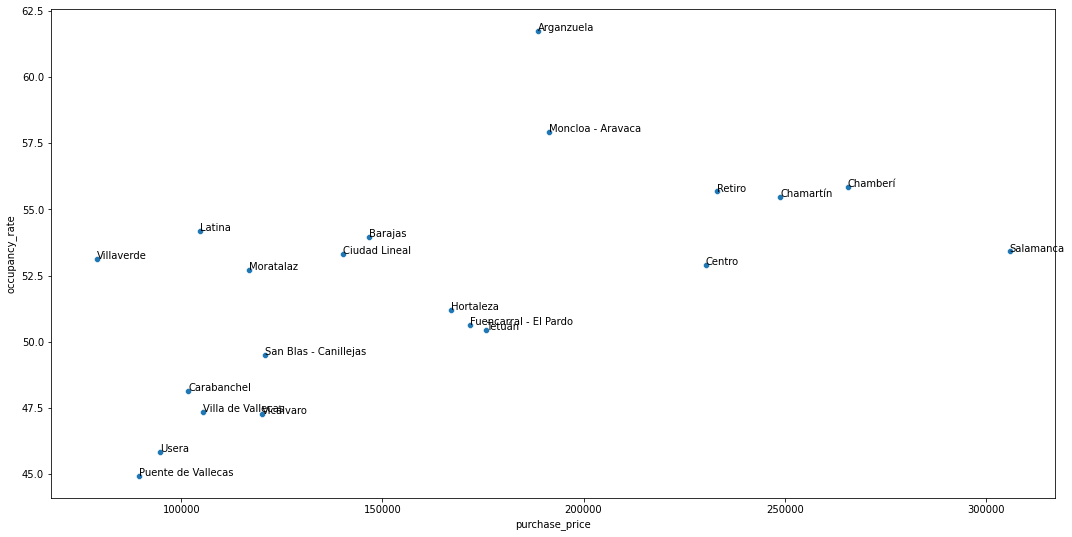

In [47]:
temp = df.groupby("neighbourhood_group")[["purchase_price","occupancy_rate"]].agg("mean")

plt.figure(figsize = (18,9))
sns.scatterplot(data = temp, x = "purchase_price", y = "occupancy_rate")

# Put the labels
for i in range(0,temp.shape[0]):
    plt.text(temp.purchase_price[i], temp.occupancy_rate[i], temp.index[i])

We confirm that Arganzuela and Moncloa are the most demanded neighbourhood groups throughout the year. Also, these present a great opportunity of investment due to their average purchase price and high demand.

**Insight 7: the districts of Arganzuela and Moncloa-Aravaca are the most demanded districts throughout the year at a relatively low price. They can be a good investment opportunity.**

### Geographic analysis on a map

Let's analyse the neighbourhood San Blas - Canillejas on a map.

We are going to colour all the properties according to the renting price, being blue the cheapest and red the most expensive options.

In [50]:
data = df[df["neighbourhood_group"] == "San Blas - Canillejas"].copy()

data['total_price_disc'] = pd.qcut(data['total_price'], q = [0, .25, .5, .75, 1.], 
                              labels=['blue', 'yellow', 'orange', 'red'])

map = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for i in range(0,len(data)):
   folium.CircleMarker(
      location = [data.iloc[i]['latitude'], data.iloc[i]['longitude']],
      popup = data.iloc[i]['total_price'],
      fill=True,
      color = data.iloc[i]['total_price_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(map)

map

**Insight 8: There are still many blue and yellow points, indicating that there is still high potential to take high benefits from the sport events in this region.**